### Bike Share Analysis

#### Import Necessary Libraries

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

#### Task #1: Read the xlsx file into a dataframe

In [2]:
bikes = pd.read_excel('cyclistic_bikes_trips.xlsx', index_col= [0])

In [42]:
# Check for NaN 
bikes[bikes.isnull().any(axis=1)]

bikes['endStationId'] = bikes['endStationId'].fillna(0).astype(int)

In [54]:
bikes.head()

,rideId,rideType,startedTime,endedTime,tripDuration,startStationName,startStationId,endStationName,endStationId,startLatitude,startLongitude,endLatitude,endLongitude,isMember,weekday,hours
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,451,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,Yes,Tuesday,20
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,223,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.9616,-87.6660,41.9542,-87.6644,Yes,Thursday,14
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,171,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.9401,-87.6455,41.9402,-87.6530,Yes,Thursday,19
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,529,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.8846,-87.6319,41.8918,-87.6206,Yes,Monday,16
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,332,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.8856,-87.6418,41.8899,-87.6343,Yes,Thursday,8


#### Task #2: What is the average trip duration for each weekdays? How about the longest?

In [3]:
bikes[['startedTime','endedTime']] = bikes[['startedTime','endedTime']].apply(pd.to_datetime)

In [4]:
bikes['tripDuration'] = (bikes['endedTime'] - bikes['startedTime']).dt.total_seconds().astype(int)

In [5]:
col_to_move = bikes.pop('tripDuration')
bikes.insert(4, 'tripDuration', col_to_move)

In [6]:
bikes['weekday'] = bikes['startedTime'].dt.day_name()

In [7]:
result = bikes.groupby('weekday')['tripDuration'].mean()

In [8]:
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
result = result.reindex(custom_order)

In [9]:
result

weekday
Monday       1044.372683
Tuesday      1000.042422
Wednesday    1022.034358
Thursday     1200.816374
Friday       1297.430378
Saturday     1942.441544
Sunday       2343.157561
Name: tripDuration, dtype: float64

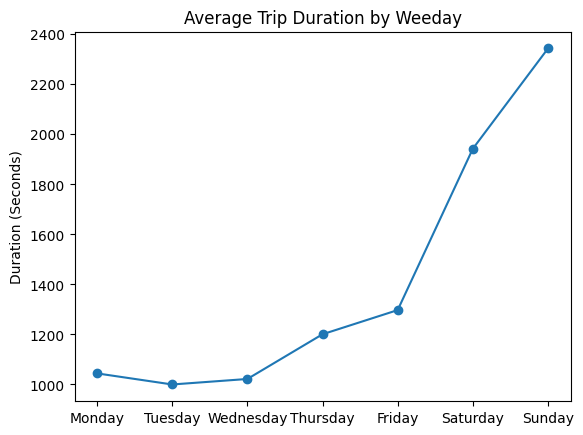

In [11]:
plt.plot(result, marker = 'o', linestyle='-')
plt.title('Average Trip Duration by Weeday')
plt.ylabel('Duration (Seconds)')
plt.show()

#### Task #3: What is the most popular hour for riding bikes?

In [12]:
bikes['hours'] = bikes['startedTime'].dt.hour

In [13]:
bikes.head()

,rideId,rideType,startedTime,endedTime,tripDuration,startStationName,startStationId,endStationName,endStationId,startLatitude,startLongitude,endLatitude,endLongitude,isMember,weekday,hours
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,451,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,Yes,Tuesday,20
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,223,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,Yes,Thursday,14
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,171,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,Yes,Thursday,19
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,529,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,Yes,Monday,16
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,332,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,Yes,Thursday,8


In [14]:
num_ride_hour = bikes.groupby('hours')['rideId'].count()

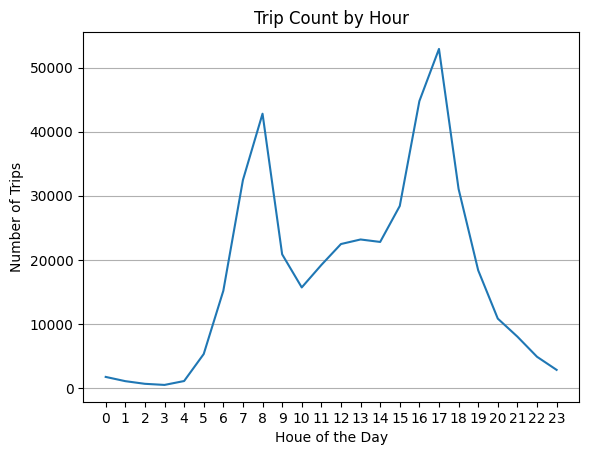

In [20]:
plt.plot(num_ride_hour,linestyle='-')

hours = [hour for hour, df in bikes.groupby('hours')]
plt.xticks(hours)
plt.title('Trip Count by Hour')
plt.ylabel('Number of Trips')
plt.xlabel('Houe of the Day')
plt.grid(axis='y')

plt.show()

#### Task #4: What are the most popular stations? And the least?

In [31]:
start_station_usage = bikes.groupby('startStationId')['rideId'].count().sort_values(ascending=False)

In [50]:
start_station_usage.head(30)

startStationId
192    7813
77     6797
91     5941
133    4626
195    4425
675    3767
287    3711
174    3637
66     3580
48     3550
43     3533
81     3269
283    3174
110    3147
49     3086
52     3084
36     3060
56     3029
53     2968
176    2954
211    2859
199    2808
212    2744
71     2681
59     2565
100    2560
74     2554
289    2486
35     2464
255    2419
Name: rideId, dtype: int64

In [52]:
start_station_usage.tail(10)

startStationId
533    2
562    2
648    2
650    2
651    2
541    2
567    2
537    1
582    1
578    1
Name: rideId, dtype: int64

In [47]:
end_station_usage = bikes.groupby('endStationId')['rideId'].count().sort_values(ascending = False)

In [51]:
end_station_usage.head(30)

endStationId
192    8323
91     7166
77     6854
133    4615
43     4227
675    3766
287    3748
174    3706
66     3646
211    3618
81     3369
110    3307
48     3252
176    3188
52     3166
49     3159
283    3105
195    2868
212    2849
59     2840
71     2830
36     2816
35     2756
199    2729
56     2681
53     2665
47     2664
90     2618
289    2424
51     2417
Name: rideId, dtype: int64

In [53]:
end_station_usage.tail(10)

endStationId
647    2
567    2
579    2
384    1
545    1
578    1
537    1
588    1
593    1
0      1
Name: rideId, dtype: int64